In [339]:
import numpy as np
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels
import statsmodels.formula.api as smf

In [2]:
results_header = "../results/do_not_delete/"
results_folders = []
results_folders.append(results_header + "2/")
results_folders.append(results_header + "3/")


headers = []

for results_folder in  results_folders:
    for subfolder in os.listdir(results_folder):
#         print(results_folder + subfolder)
        for file in os.listdir(results_folder + subfolder):
            if 'header' in file: 
                headers.append(results_folder + subfolder + "/" + file)
                #print(results_folder + subfolder + file)

In [336]:
df_results = pd.DataFrame(columns=['ID','N','C','Depth','Lambda','Coll','Loss','Total_Loss','Trials'])

for results_folder in results_folders:
    for subfolder in os.listdir(results_folder):
#         print(results_folder + subfolder)
#         for file in os.listdir(results_folder + subfolder):
#             if 'run_1_' in file:
#                 print("ooo")
#                 start_str = file.split('_run_1_.')[0]
        for file in os.listdir(results_folder + subfolder):
            if ('header' in file):
                headers.append(results_folder + subfolder + "/" + file)
                openfile = results_folder + subfolder + "/" + file
                run_type = 'M'
                D = subfolder.split('d_')[1].split('_')[0]
                C = subfolder.split('c_')[1].split('_')[0]
                L = subfolder.split('l_')[1].split('_')[0]
                N = subfolder.split('n_')[1].split('_')[0]
                I = 500
                ident = (N, I, D, run_type, L, C)
#                 print(ident)
                fheader = openfile[:-10]
                try:
                    df = pd.read_csv(fheader + "data.csv")
                except: print("File not found: " + fheader + "data.csv")
                df['3'] = df['1'].diff()
                df['4'] = df['2'].diff()
                df['5'] = df.apply(lambda x: min(1, x['3'] + x['4']), axis=1)
                if type == 'Q':
                    if ident in Q:
                        Q[ident] = Q[ident].append(df, ignore_index=True)
                    else:
                        Q[ident] = df
                if run_type == 'M':
                    if ident in M:
                        M[ident] = M[ident].append(df, ignore_index=True)
                    else:
                        M[ident] = df
                length = len(df)        
                result = {'ID': ident, 'N': float(N), 'C': float(C), 'Depth': float(D), 'Lambda': float(L), 
                          'Loss': np.max(df['1']/length), 'Coll': np.max(df['2']/length), 
                          'Total_Loss': (np.sum(df['5'])-1)/length,'Trials': length}
                if len(df_results[df_results['ID']==ident]) > 0:
                    old_length = df_results.loc[df_results['ID']==ident, 'Trials']
                    loss = df_results.loc[df_results['ID']==ident, 'Loss']
                    coll = df_results.loc[df_results['ID']==ident, 'Coll']
                    total = df_results.loc[df_results['ID']==ident, 'Total_Loss']
                    loss = (loss*old_length + result['Loss']*length)/(old_length + length)
                    coll = (coll*old_length + result['Coll']*length)/(old_length + length)
                    total = (total*old_length + result['Total_Loss']*length)/(old_length + length)
                    df_results.loc[df_results['ID']==ident, 'Trials'] += length
                else:
                    df_results = df_results.append(result, ignore_index=True)

In [337]:
df_results

,ID,N,C,Depth,Lambda,Coll,Loss,Total_Loss,Trials
0,"(250, 500, 10, M, 0.85, 0.9)",250.0,0.9,10.0,0.85,0.02500,0.00625,0.02500,1280
1,"(500, 500, 10, M, 0.85, 0.9)",500.0,0.9,10.0,0.85,0.00625,0.00000,0.00625,1280
2,"(250, 500, 10, M, 0.85, 1.0)",250.0,1.0,10.0,0.85,0.02500,0.00000,0.02500,1280
3,"(500, 500, 10, M, 0.85, 1.0)",500.0,1.0,10.0,0.85,0.00000,0.00000,0.00000,1280
4,"(250, 500, 10, M, 0.85, 1.1)",250.0,1.1,10.0,0.85,0.05000,0.00000,0.05000,1280
...,...,...,...,...,...,...,...,...,...
67,"(500, 500, 7, M, 0.95, 1.1)",500.0,1.1,7.0,0.95,0.00625,0.00000,0.00625,1280
68,"(750, 500, 7, M, 0.95, 1.1)",750.0,1.1,7.0,0.95,0.01250,0.00000,0.01250,1280
69,"(1000, 500, 7, M, 0.9, 1.1)",1000.0,1.1,7.0,0.90,0.00625,0.00625,0.01250,1280
70,"(500, 500, 7, M, 0.9, 1.1)",500.0,1.1,7.0,0.90,0.03125,0.00000,0.03125,1280


In [349]:
x = df_results.values 
x = [xx[1:] for xx in x]
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['N','C','Depth','Lambda','Coll','Loss','Total_Loss','Trials'])
df_scaled

,N,C,Depth,Lambda,Coll,Loss,Total_Loss,Trials
0,0.000000,0.0,1.0,0.0,0.500,0.5,0.444444,0.111111
1,0.333333,0.0,1.0,0.0,0.125,0.0,0.111111,0.111111
2,0.000000,0.5,1.0,0.0,0.500,0.0,0.444444,0.111111
3,0.333333,0.5,1.0,0.0,0.000,0.0,0.000000,0.111111
4,0.000000,1.0,1.0,0.0,1.000,0.0,0.888889,0.111111
...,...,...,...,...,...,...,...,...
67,0.333333,1.0,0.4,1.0,0.125,0.0,0.111111,0.111111
68,0.666667,1.0,0.4,1.0,0.250,0.0,0.222222,0.111111
69,1.000000,1.0,0.4,0.5,0.125,0.5,0.222222,0.111111
70,0.333333,1.0,0.4,0.5,0.625,0.0,0.555556,0.111111


In [350]:
reg = smf.ols('Total_Loss ~ N + C + Depth + Lambda', data=df_scaled).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Total_Loss   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     9.834
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           2.55e-06
Time:                        07:22:26   Log-Likelihood:                 17.858
No. Observations:                  72   AIC:                            -25.72
Df Residuals:                      67   BIC:                            -14.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3662      0.057      6.382      0.000       0.252       0.481
N             -0.4799      0.078     -6.185      0.000      -0.635      -0.325
C              0.1206      0.062      1.934      0.057      -0.004       0.245
Depth          0.0164      0.056      0.293      0.770      -0.096       0.128
Lambda         0.0139      0.057      0.246      0.807      -0.099       0.127
==============================================================================
Omnibus:                        4.623   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.480
Skew:                           0.607   Prob(JB):                        0.106
Kurtosis:                       2.864   Cond. No.                         5.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
# for q in Q:
#     print(q, end=": ")
#     print(len(Q[q]['3']), end=": ")
#     print(np.mean(Q[q]['1']),end = ", ")
#     print(np.mean(Q[q]['2']),end = ", ")
# #     print(np.mean(Q[q]['3']))

# depth_series = [[],[]]
# c_series = [[],[]]
# lambda_series = [[],[]]

# n_array = [250, 500, 750, 1000]
# depth_array = [5, 7, 10]
# gamma_array = [.85, .9, .95]

# for m in M:
#     print(m, end=": ")
#     print(len(M[m]['3']), end=": ")
#     print(np.mean(M[m]['1']),end = ", ")
#     print(np.mean(M[m]['2']),end = ", ")
#     print(np.mean(M[m]['3']),end = ", ")
#     print(np.var(M[m]['3']))
#     if m[5] == 1.0 and m[4] == 0.9:
#         depth_series[0].append(m[2])
#         depth_series[1].append(np.mean(M[m]['3']))
#     if m[2] == 5 and m[4] == 0.9:
#         c_series[0].append(m[5])
#         c_series[1].append(np.mean(M[m]['3']))
#     if m[5] == 10:
#         lambda_series[0].append(m[4])
#         lambda_series[1].append(np.mean(M[m]['3']))

In [ ]:
df = pd.DataFrame(np.array(depth_series).T, columns=("depth","loss"))
sns.scatterplot(data = df, x="depth", y="loss")
plt.show()

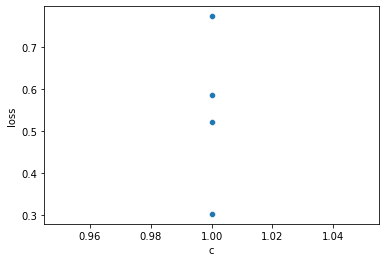

In [7]:
df = pd.DataFrame(np.array(c_series).T, columns=("c","loss"))
sns.scatterplot(data = df, x="c", y="loss")
plt.show()

In [ ]:
df = pd.DataFrame(np.array(lambda_series).T, columns=("lambda","loss"))
sns.scatterplot(data = df, x="lambda", y="loss")
plt.show()

In [179]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap


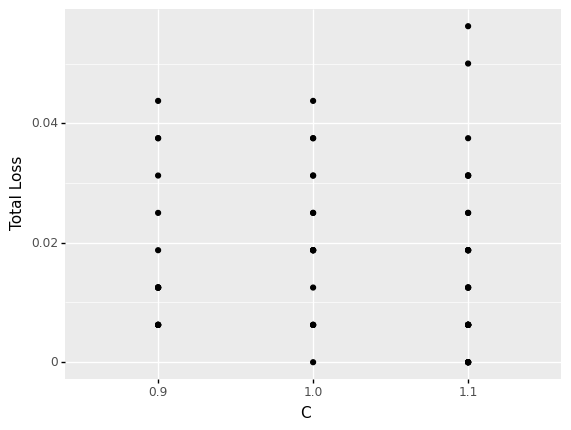

<ggplot: (197004923992)>

In [296]:
(ggplot(df_results, aes('C', 'Total Loss'))
+ geom_point()
)

In [ ]:
# Q = {}
# M = {}
# for fname in headers:
#     openfile = fname
#     print(fname)
#     f = open(openfile, "r")
#     N=0
#     I=0
#     D=0
#     c = False
#     Lambda = False
#     run_type = ''
#     reading = True
    
#     while(reading):
#         line = f.readline()
        
#         if not line:
#             reading = False
#         if 'Q' in line.strip():
#             run_type = 'Q'
#         if 'M' in line.strip():
#             run_type = 'M'
#         if 'N' in line.strip():
#             try: N = int(line.strip()[-4:])
#             except: N = int(line.strip()[-2:])
#         if 'Iterations' in line.strip():
#             try: I = int(line.strip()[-4:])
#             except: 
#                 I = int(line.strip()[-2:])
#         if 'Depth' in line.strip():
#             try: D = int(line.strip()[-3:])    
#             except: 
#                 try: D = int(line.strip()[-1:])    
#                 except: D = False
#         if 'Lambda:' in line.strip():
            
#             try: 
#                 Lambda = float(line.strip()[7:])
#             except: 
#                 Lambda = False
#         if 'c:' in line.strip():
#             try: c = float(line.strip()[3:])
#             except: c = False
#         ident = (N, I, D, run_type, Lambda, c)
#         fheader = fname[:-10]
#     try:
#         df = pd.read_csv(fheader + "data.csv")
#         df['3'] = df.apply(lambda x: min(1, x['1'] + x['2']), axis=1)
#         if type == 'Q':
#             if ident in Q:
#                 Q[ident] = Q[ident].append(df, ignore_index=True)
#             else:
#                 Q[ident] = df
#         if run_type == 'M':
#             if ident in M:
#                 M[ident] = M[ident].append(df, ignore_index=True)
#             else:
#                 M[ident] = df
#     except: print("File not found: " + fheader + "data.csv")
        
